In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ev_sales = pd.read_csv('../data/Source of Data - afdc.energy.gov/10567_pev_sales_2-28-20.csv',skiprows=2)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
ev_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vehicle      65 non-null     object 
 1   Type         55 non-null     object 
 2   2011         56 non-null     object 
 3   2012         56 non-null     object 
 4   2013         56 non-null     object 
 5   2014         56 non-null     object 
 6   2015         56 non-null     object 
 7   2016         56 non-null     object 
 8   2017         56 non-null     object 
 9   2018         56 non-null     object 
 10  2019         56 non-null     object 
 11  Total        56 non-null     object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(6), object(12)
memory usage: 9.4+ KB


In [5]:
ev_sales.head(2)

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733",NaN,NaN,NaN,NaN,NaN,NaN
1,Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888",NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cols = [12,13,14,15,16,17]
ev_sales.drop(ev_sales.columns[cols], axis=1, inplace=True)
ev_sales.head(2)

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733"
1,Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888"


In [7]:
ev_sales.tail(15)

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
51,Hyundai Kona Electric,EV,-,-,-,-,-,-,-,-,"1,721","1,721"
52,Subaru Crosstrek Hybrid,PHEV,-,-,-,-,-,-,-,-,880,880
53,Audi e-tron,EV,-,-,-,-,-,-,-,-,"5,369","5,369"
54,Kia Niro EV,EV,-,-,-,-,-,-,-,-,"1,562","1,562"
55,Total,NaN,"17,763","53,171","97,102","118,882","114,023","159,616","195,581","361,315","326,644","1,444,097"
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Data Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Transportation Research Center at Argonne Nati...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,PEVs include both EVs and PHEVs but do not inc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ev_sales = ev_sales.drop(index=[56,57,58,59,60,61,62,63,64,65])
ev_sales.tail(8)

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
48,Kia Niro Plug In,PHEV,-,-,-,-,-,-,-,"3,389","4,051","7,440"
49,Mercedes GLC 350e Hybrid,PHEV,-,-,-,-,-,-,-,567,"2,459","3,026"
50,Jaguar I-Pace,EV,-,-,-,-,-,-,-,393,"2,594","2,987"
51,Hyundai Kona Electric,EV,-,-,-,-,-,-,-,-,"1,721","1,721"
52,Subaru Crosstrek Hybrid,PHEV,-,-,-,-,-,-,-,-,880,880
53,Audi e-tron,EV,-,-,-,-,-,-,-,-,"5,369","5,369"
54,Kia Niro EV,EV,-,-,-,-,-,-,-,-,"1,562","1,562"
55,Total,NaN,"17,763","53,171","97,102","118,882","114,023","159,616","195,581","361,315","326,644","1,444,097"


In [9]:
ev_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Vehicle  56 non-null     object
 1   Type     55 non-null     object
 2   2011     56 non-null     object
 3   2012     56 non-null     object
 4   2013     56 non-null     object
 5   2014     56 non-null     object
 6   2015     56 non-null     object
 7   2016     56 non-null     object
 8   2017     56 non-null     object
 9   2018     56 non-null     object
 10  2019     56 non-null     object
 11  Total    56 non-null     object
dtypes: object(12)
memory usage: 5.7+ KB


### columns 1 through 11 need to be floats; prior to conversion, need to remove commas from the numbers

In [10]:
cols = ['2011', '2012','2013','2014','2015','2016','2017','2018','2019','Total']

ev_sales[cols] = ev_sales[cols].replace({',':''},regex=True)

In [11]:
ev_sales.head(2)

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915,156733
1,Nissan Leaf,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365,141888


In [12]:
ev_sales['2011'] = pd.to_numeric(ev_sales['2011'],errors = 'coerce')
ev_sales['2012'] = pd.to_numeric(ev_sales['2012'],errors = 'coerce')
ev_sales['2013'] = pd.to_numeric(ev_sales['2013'],errors = 'coerce')
ev_sales['2014'] = pd.to_numeric(ev_sales['2014'],errors = 'coerce')
ev_sales['2015'] = pd.to_numeric(ev_sales['2015'],errors = 'coerce')
ev_sales['2016'] = pd.to_numeric(ev_sales['2016'],errors = 'coerce')
ev_sales['2017'] = pd.to_numeric(ev_sales['2017'],errors = 'coerce')
ev_sales['2018'] = pd.to_numeric(ev_sales['2018'],errors = 'coerce')
ev_sales['2019'] = pd.to_numeric(ev_sales['2019'],errors = 'coerce')
ev_sales['Total'] = pd.to_numeric(ev_sales['Total'],errors = 'coerce')


In [13]:
ev_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Vehicle  56 non-null     object 
 1   Type     55 non-null     object 
 2   2011     5 non-null      float64
 3   2012     12 non-null     float64
 4   2013     17 non-null     float64
 5   2014     23 non-null     float64
 6   2015     28 non-null     float64
 7   2016     31 non-null     float64
 8   2017     42 non-null     float64
 9   2018     46 non-null     float64
 10  2019     46 non-null     float64
 11  Total    55 non-null     float64
dtypes: float64(10), object(2)
memory usage: 5.7+ KB


### for plotting purposes, sectioning df into EV specific df separate from PHEV specific one, leaving original df renamed to us_combined_sales

In [14]:
ev_sales.value_counts()

Vehicle      Type  2011    2012     2013     2014     2015     2016     2017     2018     2019     Total   
Chevy Volt   PHEV  7671.0  23461.0  23094.0  18805.0  15393.0  24739.0  20349.0  18306.0  4915.0   156733.0    1
Nissan Leaf  EV    9674.0  9819.0   22610.0  30200.0  17269.0  14006.0  11230.0  14715.0  12365.0  141888.0    1
Smart ED     EV    342.0   139.0    923.0    2594.0   1387.0   657.0    544.0    1219.0   680.0    8485.0      1
dtype: int64

### create plotting subsets for each type and combined

In [15]:
plotting_ev_sales = pd.DataFrame(ev_sales.sum(axis=0))

In [16]:
plotting_ev_sales

,0
Vehicle,Chevy VoltNissan LeafSmart EDMitsubishi I EVBM...
2011,35526.0
2012,106342.0
2013,194204.0
2014,237764.0
2015,228046.0
2016,319232.0
2017,391162.0
2018,722630.0
2019,653288.0


In [17]:
plotting_ev_sales.reset_index(drop=False, inplace=True)

In [18]:
plotting_ev_sales

,index,0
0,Vehicle,Chevy VoltNissan LeafSmart EDMitsubishi I EVBM...
1,2011,35526.0
2,2012,106342.0
3,2013,194204.0
4,2014,237764.0
5,2015,228046.0
6,2016,319232.0
7,2017,391162.0
8,2018,722630.0
9,2019,653288.0


In [19]:
plotting_ev_sales = plotting_ev_sales.drop([0,10])
plotting_ev_sales

,index,0
1,2011,35526.0
2,2012,106342.0
3,2013,194204.0
4,2014,237764.0
5,2015,228046.0
6,2016,319232.0
7,2017,391162.0
8,2018,722630.0
9,2019,653288.0


In [20]:
plotting_ev_sales = plotting_ev_sales.rename(columns={'index':'year', 0:'combined_ev_sales'})
plotting_ev_sales

,year,combined_ev_sales
1,2011,35526.0
2,2012,106342.0
3,2013,194204.0
4,2014,237764.0
5,2015,228046.0
6,2016,319232.0
7,2017,391162.0
8,2018,722630.0
9,2019,653288.0


### create us_ev_sales for vehicle type EV only

In [21]:
us_ev_sales = ev_sales.loc[(ev_sales['Type'] == 'EV')]

In [22]:
us_ev_sales

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
1,Nissan Leaf,EV,9674.0,9819.0,22610.0,30200.0,17269.0,14006.0,11230.0,14715.0,12365.0,141888.0
2,Smart ED,EV,342.0,139.0,923.0,2594.0,1387.0,657.0,544.0,1219.0,680.0,8485.0
3,Mitsubishi I EV,EV,76.0,588.0,1029.0,196.0,115.0,94.0,6.0,NaN,NaN,2104.0
4,BMW Active E,EV,NaN,673.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.0
6,Ford Focus EV,EV,NaN,683.0,1738.0,1964.0,1582.0,901.0,1817.0,560.0,NaN,9245.0
7,Honda Fit EV,EV,NaN,93.0,569.0,407.0,2.0,NaN,NaN,NaN,NaN,1071.0
8,Tesla Model S,EV,NaN,2400.0,19400.0,16750.0,26200.0,30200.0,26500.0,25745.0,15090.0,162285.0
9,Toyota RAV4 EV,EV,NaN,192.0,1005.0,1184.0,18.0,NaN,NaN,NaN,NaN,2399.0
13,Chevy Spark,EV,NaN,NaN,560.0,1145.0,2629.0,3035.0,23.0,7.0,NaN,7399.0
14,Fiat 500E,EV,NaN,NaN,260.0,1503.0,3477.0,3737.0,3336.0,2250.0,632.0,15195.0


In [23]:
plotting_us_ev_sales = pd.DataFrame(us_ev_sales.sum(axis=0))

In [24]:
plotting_us_ev_sales

,0
Vehicle,Nissan LeafSmart EDMitsubishi I EVBMW Active E...
Type,EVEVEVEVEVEVEVEVEVEVEVEVEVEVEVEVEVEVEVEVEVEVEV
2011,10092.0
2012,14587.0
2013,48094.0
2014,63525.0
2015,71064.0
2016,86731.0
2017,104492.0
2018,238823.0


In [25]:
plotting_us_ev_sales.reset_index(drop=False, inplace=True)

In [26]:
plotting_us_ev_sales = plotting_us_ev_sales.drop([0,1,11])
plotting_us_ev_sales

,index,0
2,2011,10092.0
3,2012,14587.0
4,2013,48094.0
5,2014,63525.0
6,2015,71064.0
7,2016,86731.0
8,2017,104492.0
9,2018,238823.0
10,2019,241912.0


In [27]:
plotting_us_ev_sales = plotting_us_ev_sales.rename(columns={'index':'year', 0:'ev_sales'})
plotting_us_ev_sales

,year,ev_sales
2,2011,10092.0
3,2012,14587.0
4,2013,48094.0
5,2014,63525.0
6,2015,71064.0
7,2016,86731.0
8,2017,104492.0
9,2018,238823.0
10,2019,241912.0


In [28]:
us_phev_sales = ev_sales.loc[(ev_sales['Type'] == 'PHEV')]

In [29]:
us_phev_sales

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,7671.0,23461.0,23094.0,18805.0,15393.0,24739.0,20349.0,18306.0,4915.0,156733.0
5,Prius PHEV,PHEV,NaN,12749.0,12088.0,13264.0,4191.0,2474.0,20936.0,27595.0,23630.0,116927.0
10,Ford C-Max Energi,PHEV,NaN,2374.0,7154.0,8433.0,7591.0,7957.0,8140.0,582.0,NaN,42231.0
11,Honda Accord,PHEV,NaN,NaN,526.0,449.0,64.0,NaN,NaN,NaN,NaN,1039.0
12,Ford Fusion Energi,PHEV,NaN,NaN,6089.0,11550.0,9750.0,15938.0,9632.0,8074.0,7476.0,68509.0
15,Porsche Panamera S E-Hybrid,PHEV,NaN,NaN,51.0,879.0,407.0,393.0,18.0,2036.0,1958.0,5742.0
16,Cadillac ELR,PHEV,NaN,NaN,6.0,1310.0,1024.0,534.0,17.0,1.0,NaN,2892.0
19,BMW i8,PHEV,NaN,NaN,NaN,555.0,2265.0,1594.0,488.0,772.0,1102.0,6776.0
22,Porsche Cayenne S E-Hybrid,PHEV,NaN,NaN,NaN,112.0,1163.0,2111.0,1574.0,1022.0,1140.0,7122.0
23,Mercedes S550 Plug,PHEV,NaN,NaN,NaN,NaN,118.0,550.0,666.0,96.0,371.0,1801.0


In [30]:
plotting_us_phev_sales = pd.DataFrame(us_phev_sales.sum(axis=0))

In [31]:
plotting_us_phev_sales

,0
Vehicle,Chevy VoltPrius PHEVFord C-Max EnergiHonda Acc...
Type,PHEVPHEVPHEVPHEVPHEVPHEVPHEVPHEVPHEVPHEVPHEVPH...
2011,7671.0
2012,38584.0
2013,49008.0
2014,55357.0
2015,42959.0
2016,72885.0
2017,91089.0
2018,122492.0


In [32]:
plotting_us_phev_sales.reset_index(drop=False, inplace=True)

In [33]:
plotting_us_phev_sales = plotting_us_phev_sales.drop([0,1,11])
plotting_us_phev_sales

,index,0
2,2011,7671.0
3,2012,38584.0
4,2013,49008.0
5,2014,55357.0
6,2015,42959.0
7,2016,72885.0
8,2017,91089.0
9,2018,122492.0
10,2019,84732.0


In [34]:
plotting_us_phev_sales = plotting_us_phev_sales.rename(columns={'index':'year', 0:'phev_sales'})
plotting_us_phev_sales

,year,phev_sales
2,2011,7671.0
3,2012,38584.0
4,2013,49008.0
5,2014,55357.0
6,2015,42959.0
7,2016,72885.0
8,2017,91089.0
9,2018,122492.0
10,2019,84732.0


## Importing dataset containing all US auto sales for the same period as other data

In [35]:
annual_auto_sales = pd.read_csv('../data/Source of Data - FRED.stlouisfed.org/TOTALNSA.csv')

In [36]:
annual_auto_sales

,DATE,TOTALNSA
0,1976-01-01,1107.8750000000000000
1,1977-01-01,1238.2500000000000000
2,1978-01-01,1285.0666666666666667
3,1979-01-01,1179.0416666666666667
4,1980-01-01,955.7666666666666667
5,1981-01-01,899.1583333333333333
6,1982-01-01,878.5166666666666667
7,1983-01-01,1024.6583333333333333
8,1984-01-01,1206.9416666666666667
9,1985-01-01,1310.0083333333333333


In [37]:
annual_auto_sales['DATE'] = annual_auto_sales['DATE'].str[:4]
annual_auto_sales

,DATE,TOTALNSA
0,1976,1107.8750000000000000
1,1977,1238.2500000000000000
2,1978,1285.0666666666666667
3,1979,1179.0416666666666667
4,1980,955.7666666666666667
5,1981,899.1583333333333333
6,1982,878.5166666666666667
7,1983,1024.6583333333333333
8,1984,1206.9416666666666667
9,1985,1310.0083333333333333


### delete rows not related to timeframe 2009 - 2019

In [38]:
rowss= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,44,45]
annual_auto_sales = annual_auto_sales.drop(rowss)

In [39]:
annual_auto_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 33 to 43
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DATE      11 non-null     object
 1   TOTALNSA  11 non-null     object
dtypes: object(2)
memory usage: 264.0+ bytes


In [40]:
annual_auto_sales

,DATE,TOTALNSA
33,2009,883.4981666666666667
34,2010,981.0438333333333333
35,2011,1087.3655000000000000
36,2012,1231.6236666666666667
37,2013,1323.5593333333333333
38,2014,1404.9869166666666667
39,2015,1488.1103333333333333
40,2016,1489.8589166666666667
41,2017,1463.7605833333333333
42,2018,1476.0670000000000000


In [41]:
annual_auto_sales['TOTALNSA'] = annual_auto_sales['TOTALNSA'].str.split('.').str[0]

In [42]:
annual_auto_sales.head(10)

,DATE,TOTALNSA
33,2009,883
34,2010,981
35,2011,1087
36,2012,1231
37,2013,1323
38,2014,1404
39,2015,1488
40,2016,1489
41,2017,1463
42,2018,1476


In [43]:
annual_auto_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 33 to 43
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DATE      11 non-null     object
 1   TOTALNSA  11 non-null     object
dtypes: object(2)
memory usage: 264.0+ bytes


In [44]:
annual_auto_sales['TOTALNSA'] = annual_auto_sales['TOTALNSA'].astype(float)
annual_auto_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 33 to 43
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      11 non-null     object 
 1   TOTALNSA  11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 264.0+ bytes


In [45]:
annual_auto_sales['TOTALNSA'] = annual_auto_sales['TOTALNSA'] * 10000 
annual_auto_sales.head(2)

,DATE,TOTALNSA
33,2009,8830000.0
34,2010,9810000.0


In [46]:
annual_auto_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 33 to 43
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      11 non-null     object 
 1   TOTALNSA  11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 264.0+ bytes


In [47]:
annual_auto_sales = annual_auto_sales.rename(columns={'DATE':'year', 'TOTALNSA':'all_vehicle_sales'})
annual_auto_sales.head(2)

,year,all_vehicle_sales
33,2009,8830000.0
34,2010,9810000.0


## merging 3 df's into one df in preparation for creating visuals on just EV sales

In [48]:
ev_charting = plotting_ev_sales.merge(plotting_us_ev_sales, how='right')

In [49]:
ev_charting = ev_charting.merge(plotting_us_phev_sales, how='right')

In [50]:
ev_charting

,year,combined_ev_sales,ev_sales,phev_sales
0,2011,35526.0,10092.0,7671.0
1,2012,106342.0,14587.0,38584.0
2,2013,194204.0,48094.0,49008.0
3,2014,237764.0,63525.0,55357.0
4,2015,228046.0,71064.0,42959.0
5,2016,319232.0,86731.0,72885.0
6,2017,391162.0,104492.0,91089.0
7,2018,722630.0,238823.0,122492.0
8,2019,653288.0,241912.0,84732.0


In [51]:
ev_charting = ev_charting.melt(id_vars='year',var_name='sales_type', value_name='units_sold')

In [52]:
ev_charting['units_sold'] = ev_charting['units_sold'].astype(float)
ev_charting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        27 non-null     object 
 1   sales_type  27 non-null     object 
 2   units_sold  27 non-null     float64
dtypes: float64(1), object(2)
memory usage: 776.0+ bytes


### creating visuals of merged EV sales df's

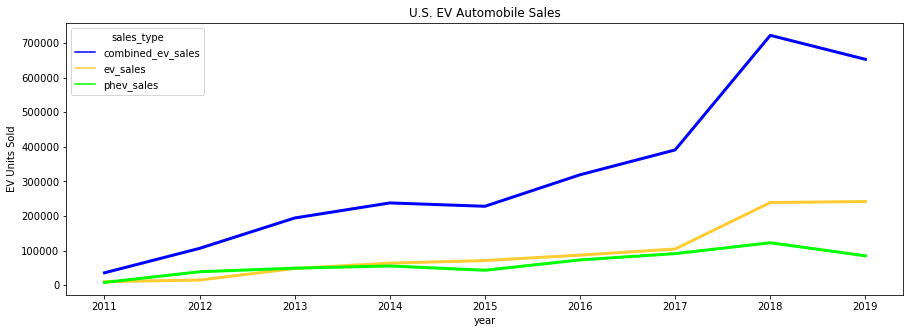

In [53]:
plt.figure(figsize = (15,5)) 
ax = sns.lineplot(x = 'year', y = 'units_sold', data = ev_charting, hue = 'sales_type', linewidth = 3.0,palette=['blue','#ffcc33','#00ff00'])
#plt.ylabel('Vehicles Sold (in Millions)')
#plt.title('EV Penetration in US Market')

ax.set(ylabel='EV Units Sold', title='U.S. EV Automobile Sales')
plt.show();

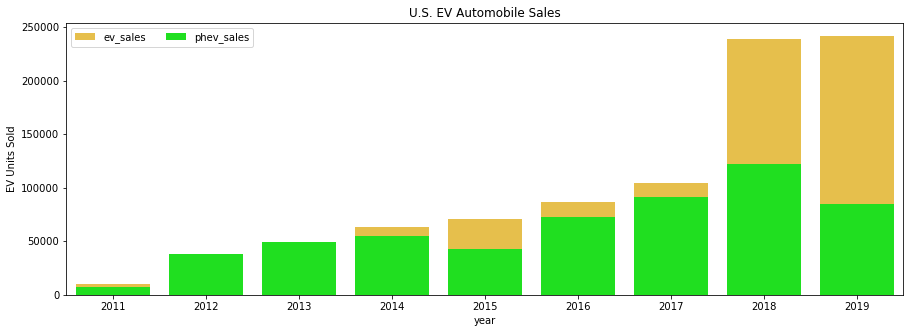

In [54]:
plt.figure(figsize = (15,5)) 
bar_plot1 = sns.barplot(x='year', y='ev_sales', data=plotting_us_ev_sales, label="ev_sales",color='#ffcc33',
                        estimator=sum, ci=None).set(title='U.S. EV Automobile Sales')
bar_plot2 = sns.barplot(x='year', y='phev_sales', data=plotting_us_phev_sales, label="phev_sales",color='#00ff00').set(ylabel='EV Units Sold')
sns.color_palette()
plt.legend(ncol=2, loc="upper left", frameon=True)


plt.show();

## merging 4 df's into one df in preparation for creating visuals

In [55]:
charting = annual_auto_sales.merge(plotting_ev_sales, how='right')
charting.head(2)

,year,all_vehicle_sales,combined_ev_sales
0,2011,10870000.0,35526.0
1,2012,12310000.0,106342.0


In [56]:
charting = charting.merge(plotting_us_ev_sales, how='right')
charting.head(2)

,year,all_vehicle_sales,combined_ev_sales,ev_sales
0,2011,10870000.0,35526.0,10092.0
1,2012,12310000.0,106342.0,14587.0


In [57]:
charting = charting.merge(plotting_us_phev_sales, how='right')
charting.head(2)

,year,all_vehicle_sales,combined_ev_sales,ev_sales,phev_sales
0,2011,10870000.0,35526.0,10092.0,7671.0
1,2012,12310000.0,106342.0,14587.0,38584.0


In [58]:
charting = charting.melt(id_vars='year',var_name='sales_type', value_name='units_sold')

In [59]:
charting.head()

,year,sales_type,units_sold
0,2011,all_vehicle_sales,10870000.0
1,2012,all_vehicle_sales,12310000.0
2,2013,all_vehicle_sales,13230000.0
3,2014,all_vehicle_sales,14040000.0
4,2015,all_vehicle_sales,14880000.0


In [60]:
charting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        36 non-null     object
 1   sales_type  36 non-null     object
 2   units_sold  36 non-null     object
dtypes: object(3)
memory usage: 992.0+ bytes


In [61]:
charting['units_sold'] = charting['units_sold'].astype(float)
charting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        36 non-null     object 
 1   sales_type  36 non-null     object 
 2   units_sold  36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


## creating visuals to display data

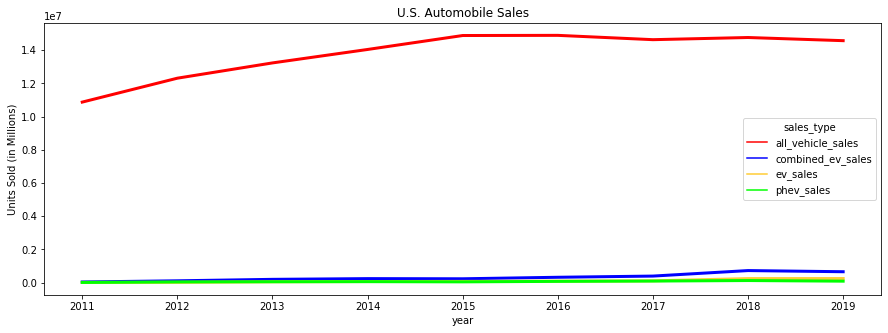

In [62]:
plt.figure(figsize = (15,5)) 
ax = sns.lineplot(x = 'year', y = 'units_sold', data = charting, hue = 'sales_type', linewidth = 3.0,palette=['red','blue','#ffcc33','#00ff00'])
#plt.ylabel('Vehicles Sold (in Millions)')
#plt.title('EV Penetration in US Market')
ax.set(ylabel='Units Sold (in Millions)', title='U.S. Automobile Sales')
plt.show();

In [63]:
charting

,year,sales_type,units_sold
0,2011,all_vehicle_sales,10870000.0
1,2012,all_vehicle_sales,12310000.0
2,2013,all_vehicle_sales,13230000.0
3,2014,all_vehicle_sales,14040000.0
4,2015,all_vehicle_sales,14880000.0
5,2016,all_vehicle_sales,14890000.0
6,2017,all_vehicle_sales,14630000.0
7,2018,all_vehicle_sales,14760000.0
8,2019,all_vehicle_sales,14570000.0
9,2011,combined_ev_sales,35526.0


### subsetting 'charting' to just 'all_us_sales' for plotting purposes

In [64]:
all_us_sales = charting.copy()
all_us_sales.head(2)

,year,sales_type,units_sold
0,2011,all_vehicle_sales,10870000.0
1,2012,all_vehicle_sales,12310000.0


In [65]:
all_us_sales = all_us_sales.drop(index=[9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
all_us_sales

,year,sales_type,units_sold
0,2011,all_vehicle_sales,10870000.0
1,2012,all_vehicle_sales,12310000.0
2,2013,all_vehicle_sales,13230000.0
3,2014,all_vehicle_sales,14040000.0
4,2015,all_vehicle_sales,14880000.0
5,2016,all_vehicle_sales,14890000.0
6,2017,all_vehicle_sales,14630000.0
7,2018,all_vehicle_sales,14760000.0
8,2019,all_vehicle_sales,14570000.0


### subsetting 'charting' to just 'combined_ev_sales' for plotting purposes

In [66]:
combined_ev_sales = charting.copy()
combined_ev_sales.head(2)

,year,sales_type,units_sold
0,2011,all_vehicle_sales,10870000.0
1,2012,all_vehicle_sales,12310000.0


In [67]:
combined_ev_sales = combined_ev_sales.drop(index=[0,1,2,3,4,5,6,7,8,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
combined_ev_sales

,year,sales_type,units_sold
9,2011,combined_ev_sales,35526.0
10,2012,combined_ev_sales,106342.0
11,2013,combined_ev_sales,194204.0
12,2014,combined_ev_sales,237764.0
13,2015,combined_ev_sales,228046.0
14,2016,combined_ev_sales,319232.0
15,2017,combined_ev_sales,391162.0
16,2018,combined_ev_sales,722630.0
17,2019,combined_ev_sales,653288.0


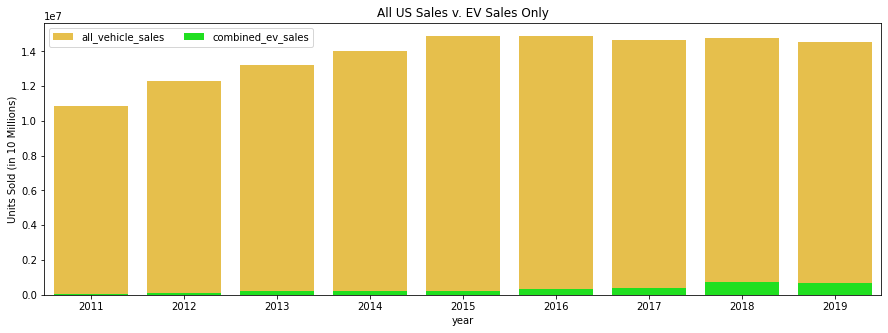

In [68]:
plt.figure(figsize = (15,5)) 
bar_plot1 = sns.barplot(x='year', y='units_sold', data=all_us_sales, label="all_vehicle_sales", color="#ffcc33",
                        estimator=sum, ci=None).set(title='All US Sales v. EV Sales Only')
bar_plot2 = sns.barplot(x='year', y='units_sold', data=combined_ev_sales, label="combined_ev_sales", color="#00ff00").set(ylabel='Units Sold (in 10 Millions)')

plt.legend(ncol=2, loc="upper left", frameon=True)
plt.show();